Step 1: Import required libraries and set up the environment



In [ ]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from csv import DictReader
from google.colab import drive

pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', 100)
warnings.filterwarnings("ignore")

# Connecting to Google Drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


Step 2: Reading the dataset


In [ ]:
# Define directory and file names
directory = 'gdrive/MyDrive/ADM/'
train_file = 'train_v3.csv'
test_file = 'test__no_lossv3.csv'

In [ ]:
# Read train and test datasets from CSV files
train_df = pd.read_csv(directory + train_file, index_col='id')
test_df = pd.read_csv(directory + test_file, index_col='id')

In [ ]:
test_df.head()

,Unnamed: 0,f1,f3,f4,f5,f6,f7,f8,f9,f13,...,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777
id,,,,,,,,,,,,,,,,,,,,,
7933,7933,119,0.31,1500,4,2496,89.00,2899.00,121.60,13,...,-0.47,-2.36,5,1.51,-1.07,0.80,0.28,0.53,1,0
101860,101860,117,0.79,1100,16,842,8117.00,2907.00,124.86,6,...,-0.51,-42.72,83,28.13,-20.23,15.27,0.27,0.70,0,0
62580,62580,129,0.74,1500,17,14213,5505.00,251.00,127.50,10,...,-0.28,-0.55,2,0.17,-0.05,0.02,0.10,1.57,1,0
1760,1760,159,0.85,4100,2,79754,2298.00,2188.00,156.44,11,...,-0.43,-1.71,4,1.02,-0.74,0.61,0.27,-0.90,0,1
48008,48008,125,0.50,1300,15,76957,2816.00,3721.00,128.08,13,...,-0.42,-6.65,16,3.80,-2.52,1.78,0.25,-0.67,0,0


In [ ]:
# Display the first few rows
train_df.head()

,Unnamed: 0,f1,f3,f4,f5,f6,f7,f8,f9,f13,...,f769,f770,f771,f772,f773,f774,f775,f776,f777,loss
id,,,,,,,,,,,,,,,,,,,,,
78539,78539,120,0.15,2200,4,76878,8703.00,724.00,118.93,14,...,-5.81,10,3.98,-2.89,2.18,0.25,0.94,0,0,0
61541,61541,154,0.35,4200,4,76635,2843.00,3253.00,158.08,4,...,-5.22,7,4.17,-3.50,3.02,0.20,0.75,1,1,0
76531,76531,126,0.98,1500,10,7399,437.00,1453.00,123.31,15,...,-4.41,12,2.25,-1.35,0.89,0.23,-0.75,1,0,0
22066,22066,127,0.95,3100,7,14448,2681.00,2136.00,128.62,11,...,-6.14,12,4.06,-3.00,2.31,0.28,0.41,0,0,11
45589,45589,162,0.52,3500,7,80502,3840.00,130.00,159.78,8,...,-14.27,28,9.57,-7.15,5.59,0.29,0.47,0,1,0


Step 3: Checking the information about train and test data


In [ ]:
train_df.info()
test_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 78539 to 8845
Columns: 762 entries, Unnamed: 0 to loss
dtypes: float64(649), int64(95), object(18)
memory usage: 465.7+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25471 entries, 7933 to 37424
Columns: 761 entries, Unnamed: 0 to f777
dtypes: float64(641), int64(101), object(19)
memory usage: 148.1+ MB


Step 4: Checking null values in the data


In [ ]:
def df_nulls(df):
    isnull = df.isnull().sum().sort_values(ascending=False).to_frame()
    isnull.columns = ['How_many']
    isnull['precentage'] = np.around(((isnull / len(df) * 100)[(isnull / len(df) * 100) != 0]), decimals=2)
    print (f"Your selected dataframe has {str(df.shape[1])} columns.\nThere are {str(len(isnull[isnull.How_many>0]))} columns that have missing values.")
    return isnull

df_nulls(train_df).head(20)
df_nulls(test_df).head(20)

Your selected dataframe has 762 columns.
There are 521 columns that have missing values.
Your selected dataframe has 761 columns.
There are 490 columns that have missing values.


,How_many,precentage
f662,4572,17.95
f663,4572,17.95
f160,4562,17.91
f159,4562,17.91
f618,4511,17.71
f619,4511,17.71
f330,4453,17.48
f331,4453,17.48
f170,4404,17.29
f169,4404,17.29


Step 5: Preprocessing the data


In [ ]:
# Select numerical columns
num_columns = [column for column in train_df.columns if train_df[column].dtype != 'object']
train_df = train_df[num_columns]
test_new = test_df[num_columns[:-1]]

# Drop rows with missing target values
train_df.dropna(axis=0, subset=['loss'], inplace=True)

# Split train data into training and validation sets
X_train_all = train_df.drop(['loss'], axis=1)
y_train_all = train_df.loss
X_train, X_valid, y_train, y_valid = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)

# Define preprocessing pipeline
num_tran = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])
num_columns.remove('loss')
preprocessor = ColumnTransformer(transformers=[
    ('num', num_tran, num_columns)
], remainder="drop")

# Preprocess the data
X_train_tran = preprocessor.fit_transform(X_train)
X_valid_tran = preprocessor.transform(X_valid)

# Convert preprocessed data from numpy array to DataFrame
def array_to_df(arr):
    return pd.DataFrame(data=arr, columns=X_train.columns)

X_train_tran = array_to_df(X_train_tran)
X_valid_tran = array_to_df(X_valid_tran)



Step 6 : Create Logistic regression Model

In [ ]:
# Create a LogisticRegression model to help us choose the right features
from sklearn.linear_model import LogisticRegression

my_model = LogisticRegression().fit(X_train_tran, y_train)

Step 7: Identify important features




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107747 sha256=1044aa79e549bec4c8ff5e934f0fa5c5c8d91b223cc75b8b88e01b4205027352
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5
Your selected dataframe has 744 columns.
There are 509 columns that have missing values.


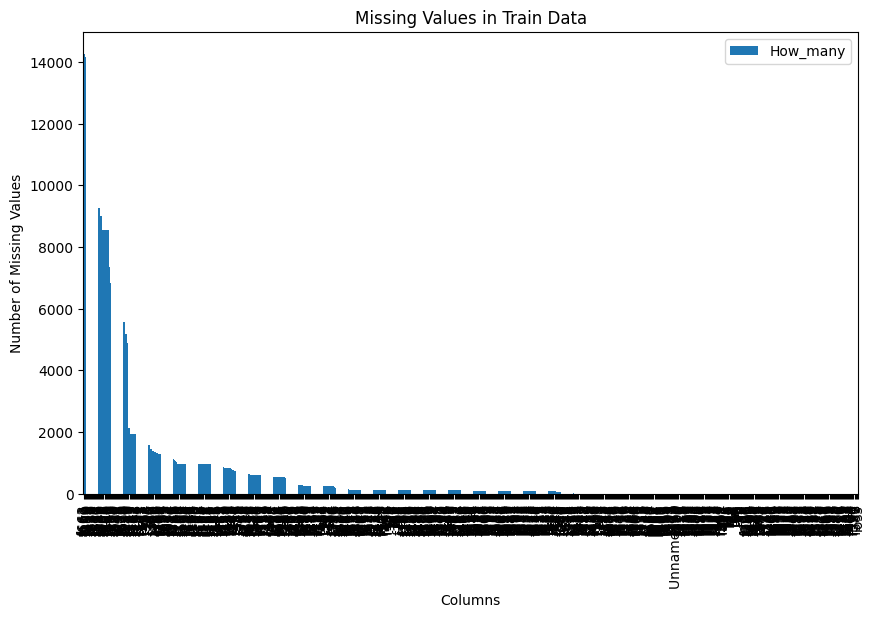

In [ ]:
!pip install eli5

import eli5
from eli5.sklearn import PermutationImportance

# Fit the PermutationImportance to the validation data
perm = PermutationImportance(my_model, random_state=1).fit(X_valid_tran.head(1000), y_valid.head(1000))
# Display the feature importances
eli5.show_weights(perm, feature_names=X_valid_tran.columns.tolist())

import matplotlib.pyplot as plt

# Call df_nulls function on train_df
train_nulls = df_nulls(train_df)

# Create bar chart of missing values
train_nulls.plot.bar(y='How_many', figsize=(10, 6))
plt.title('Missing Values in Train Data')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.show()


In [ ]:
test_df.head()

,Unnamed: 0,f1,f3,f4,f5,f6,f7,f8,f9,f13,...,f768,f769,f770,f771,f772,f773,f774,f775,f776,f777
id,,,,,,,,,,,,,,,,,,,,,
7933,7933,119,0.31,1500,4,2496,89.00,2899.00,121.60,13,...,-0.47,-2.36,5,1.51,-1.07,0.80,0.28,0.53,1,0
101860,101860,117,0.79,1100,16,842,8117.00,2907.00,124.86,6,...,-0.51,-42.72,83,28.13,-20.23,15.27,0.27,0.70,0,0
62580,62580,129,0.74,1500,17,14213,5505.00,251.00,127.50,10,...,-0.28,-0.55,2,0.17,-0.05,0.02,0.10,1.57,1,0
1760,1760,159,0.85,4100,2,79754,2298.00,2188.00,156.44,11,...,-0.43,-1.71,4,1.02,-0.74,0.61,0.27,-0.90,0,1
48008,48008,125,0.50,1300,15,76957,2816.00,3721.00,128.08,13,...,-0.42,-6.65,16,3.80,-2.52,1.78,0.25,-0.67,0,0


Step 8: Select important features



In [ ]:
from sklearn.feature_selection import SelectFromModel

# Select important features
sel = SelectFromModel(perm, threshold=0.001, prefit=True)
X_train_s_trans = sel.transform(X_train_tran)
X_valid_s_trans = sel.transform(X_valid_tran)

# Check the shape of the filtered data
X_train_s_trans.shape


(64000, 84)

Step 9: Apply cross-validation



In [ ]:
from sklearn.model_selection import cross_val_score

def cross_val(X_train_s_trans, y_train, model):
    # Apply k-Fold Cross Validation
    accuracies = cross_val_score(estimator=model, X=X_train_s_trans, y=y_train, cv=5)
    return accuracies.mean()


Step 10: Train and evaluate the model



In [ ]:
def fit_and_evaluate(model):
    # Train the model
    model.fit(X_train_s_trans, y_train)

    # Evaluate
    model_cross = cross_val(X_train_s_trans, y_train, model)

    # Return the performance metric
    return model_cross

# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
randomForest = RandomForestClassifier(n_estimators=10, criterion='entropy')
randomForest_cross = fit_and_evaluate(randomForest)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % randomForest_cross)


Random Forest Performance on the test set: Cross Validation Score = 0.9080


Create a submission file,use the test dataframe and consider 'id' and 'loss'=which is the prediction results.

In [ ]:
# Preprocessing and filtering the whole train and test data after checking its Cross Validation Score.
new_train = preprocessor.fit_transform(X_train_all)
new_test = preprocessor.transform(test_df)

new_train = sel.transform(new_train)
new_test = sel.transform(new_test)

In [ ]:
# Make predictions on the test data
y_pred = randomForest.predict(new_test)

print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
# Reset the index
test_df = test_df.reset_index()

# Rename the column
test_df = test_df.rename(columns={'index': 'id'})

# Print the dataframe
print(test_df.columns)

Index(['id', 'Unnamed: 0', 'f1', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9',
       ...
       'f768', 'f769', 'f770', 'f771', 'f772', 'f773', 'f774', 'f775', 'f776',
       'f777'],
      dtype='object', length=762)


In [ ]:
# Create a submission file
submission = pd.DataFrame({'id': test_df['id'], 'loss': y_pred})
submission.to_csv('submission.csv', index=False)

In [ ]:
print(submission[['id', 'loss']].head(10))

       id  loss
0    7933     0
1  101860     0
2   62580     0
3    1760     0
4   48008     0
5    9308     0
6   27862     0
7   87760     0
8   53334     2
9   72303     0
